# Quadren
---

In [1]:
import matplotlib.pyplot as plt
import numpy             as np

from scipy.spatial.transform import Rotation

Example data (a Phantom model created by Jolien Malfait).

In [2]:
input_link = "https://owncloud.ster.kuleuven.be/index.php/s/6mCZjZ2erTsXq5Y/download"
input_file = "input_file.txt"

Download the example data.

In [3]:
!wget $input_link --output-document $input_file

--2023-01-24 15:37:24--  https://owncloud.ster.kuleuven.be/index.php/s/6mCZjZ2erTsXq5Y/download
Resolving owncloud.ster.kuleuven.be (owncloud.ster.kuleuven.be)... 134.58.130.75
Connecting to owncloud.ster.kuleuven.be (owncloud.ster.kuleuven.be)|134.58.130.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388714637 (371M) [application/octet-stream]
Saving to: ‘input_file.txt’

input_file.txt      100%[===================>] 370.71M  59.2MB/s    in 5.9s    

2023-01-24 15:37:30 (62.4 MB/s) - ‘input_file.txt’ saved [388714637/388714637]



Read the file and extract the relevant data.

In [4]:
# Load the model file 
model  = np.loadtxt(input_file, skiprows=14, usecols=(0,1,2,4,5), unpack=True)

# Extract the points and the data
points = model[:3].T
h      = model[ 3].T
rho    = model[ 4].T

# Only keep the "physical" points (with h>0 and rho>0)
select = np.logical_and(h>0.0, rho>0.0)
points = points[select]
rho    = rho   [select]

Get an idea of the point range.

In [5]:
print("max ", np.max(points, axis=0))
print("min ", np.min(points, axis=0))

max  [195.81732739 199.40977151 199.72470206]
min  [-203.27701538 -199.62259834 -199.59304744]


In [6]:
# Crop the data (just to show we can)
select = np.all(np.abs(points) < 150, axis=1)
points = points[select]
rho    = rho   [select]

In [7]:
# Rotate the points (just to show we can)
mat    = Rotation.from_rotvec(np.pi/3 * np.array([0,1,0])).as_matrix()
points = points @ mat

Use quadren to render an image.

In [8]:
from quadren import Quadren

# Define the dimensions of the Quadren box
xyz_dim = np.array([800, 800, 100])

# Create a quadren object
quadren = Quadren(points, xyz_dim)

# Map data to the Quadren box
dat = quadren.map_data(rho)

# Render an image of the mapped data
img = quadren.render(dat)

Some cosmetics.

In [9]:
# Linear map
img = (img - np.min(img)) / (np.max(img) - np.min(img))

# Avoid zeros
img[img==0.0] = np.min(img[img!=0.0])

# Log transform
img = np.log10(img)

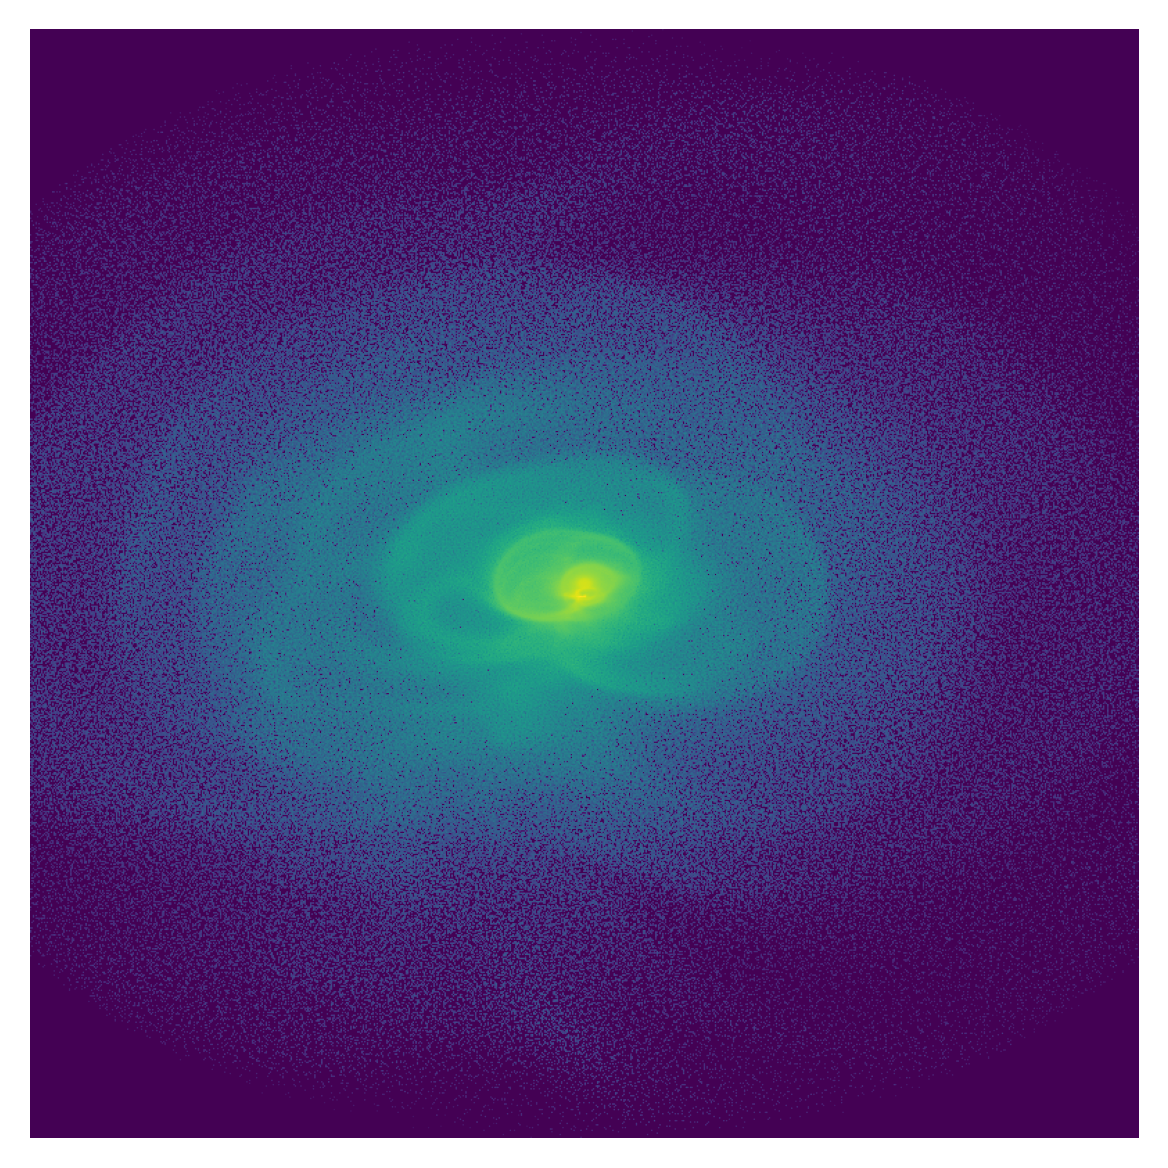

In [10]:
plt.figure(dpi=300)
plt.axis('off')
plt.imshow(img)
plt.show()

Smooth the image.

In [11]:
from stencils import kernel_2D_smooth

In [12]:
img = kernel_2D_smooth(img)
img = kernel_2D_smooth(img)

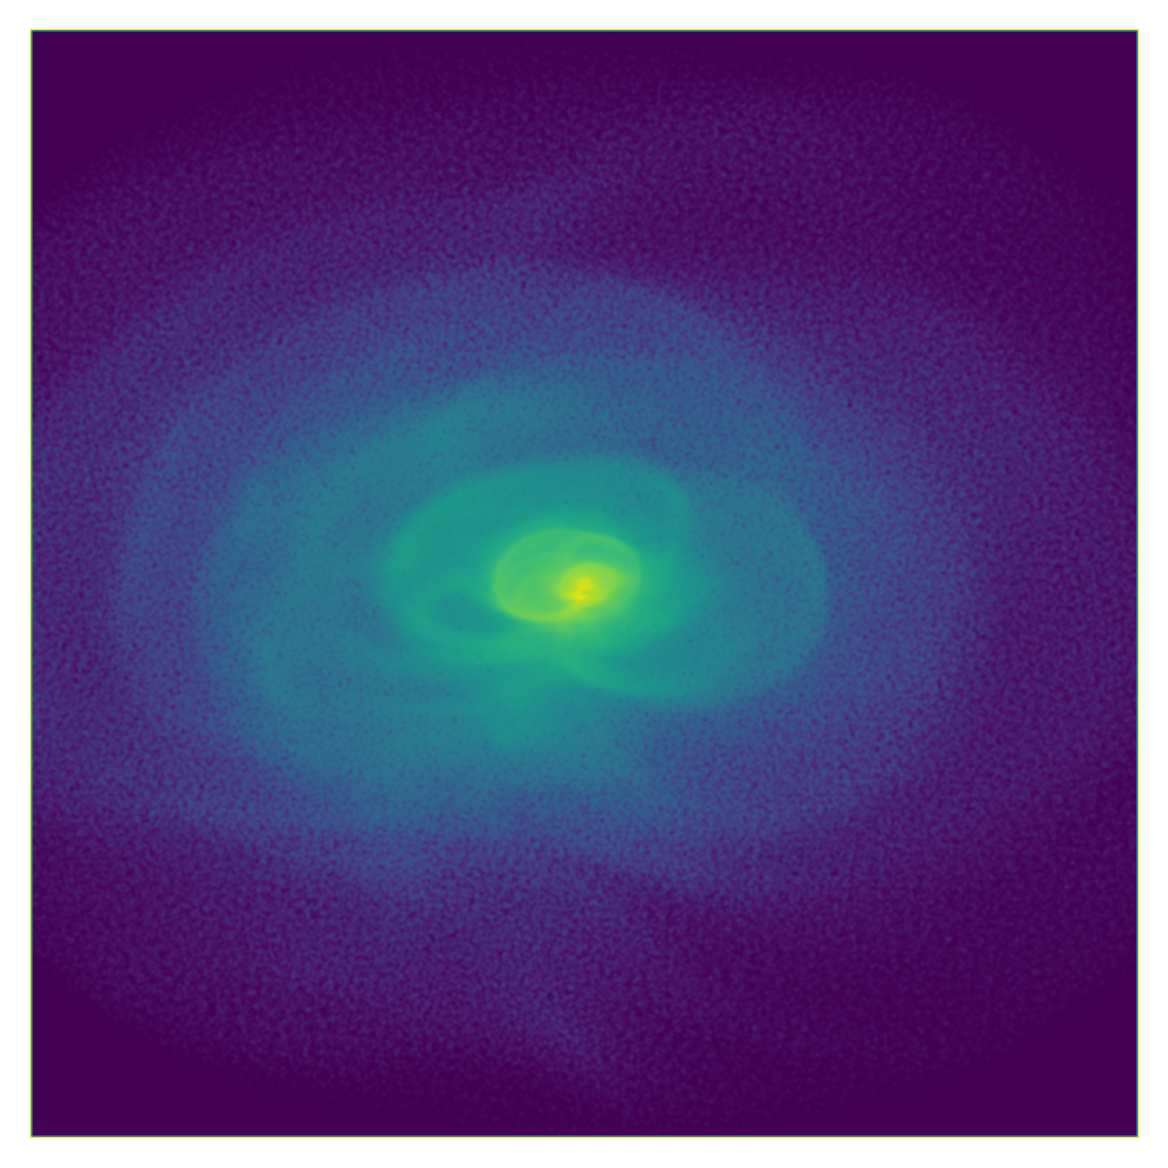

In [13]:
plt.figure(dpi=300)
plt.axis('off')
plt.imshow(img)
plt.show()